# Introduction

<img src='img/nytimes.jpg'>

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.
<br>
One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.
<br>
In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

#### Objective : <b>Build machine learning model to classify which passenger more likely to survived based on the dataset<b>

## Acquire Data
We need to import python libraries that containing the necessary functionality we will need

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import re

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
combine = [train_df, test_df]

print('total of train_df: {}'.format(train_df.shape))
print('total of train_df: {}'.format(test_df.shape))

total of train_df: (891, 12)
total of train_df: (418, 11)


In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Analyze by describing data

### Which features are available in the dataset?

Here's the feature description:

- <b>`Survived`</b>: Outcome of survival
- <b>`Pclass`</b>: Socio-economic class
- <b>`Name`</b>: Name of passenger
- <b>`Sex`</b>: Sex of the passenger
- <b>`Age`</b>: Age of the passenger
- <b>`SibSp`</b>: Number of siblings and spouses of the passenger aboard
- <b>`Parch`</b>: Number of parents and children of the passenger aboard
- <b>`Ticket`</b>: Ticket number of the passenger
- <b>`Fare`</b>: Fare paid by the passenger
- <b>`Cabin`</b>: Cabin number of the passenger
- <b>`Embarked`</b>: Port of embarkation of the passenger 

For more information, you can see [this documentation.](https://www.kaggle.com/c/titanic/data)

### Which features are categorical?
Categorical represent types of data which may be divided into group. Example of categorical group are race, sex, age group, and educational level. Althought the latter two group may also be considered in a numerical manner, it's often more informative to categorize into small number of groups.
- `Survived` (True or False / 1 or 0)
- `Sex` (Male, Female) 
- `Embarked` (C, S, Q)
- `Pclass` (1, 2, 3)

### Which features are numerical?
Numerical represent types of data which can be measurement, such as a person's height, weight, IQ, or blood pressure. It can be discrete or continous.
- `Age` (continous)
- `Fare` (continous)
- `Sibsp` (discrete)
- `Parch` (discrete)

### Which features are mixed data types?
Numerical, alphanumeric data within same feature. These are candidates for correcting.
- `Ticket` is a mix of numeric and alphanumeric
- `Cabin` is alphanumeric

### Which features may contain errors or typos?
This is harder to review for a large dataset, however reviewing a few samples from a smaller dataset may just tell us outright, which features may require correcting.
- `Name` feature may contain error of typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names

### Which features contain blank, null or empty values?
These will require correcting before used for analyzing.
- `Cabin` : 687 records (train_df) and 327 record (test_df)
- `Age` : 177 records (train_df) and 86 record(test_df)
- `Embarked` : 2 records (train_df)
- `Fare` : 1 record (test_df)

In [5]:
total_null = train_df.isnull().sum()
percent_null = (round(total_null/train_df.isnull().count()*100, 2))
missing_data = pd.concat([total_null, percent_null], axis=1, keys=['Total', '%']).sort_values('%', ascending=False)
missing_data.head()

,Total,%
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Survived,0,0.00


`Embarked` featue has only 2 missing values, which can easily to handled. To deal with `Age` which has 117 missing feature, it'll be much more tricky. The `Cabin` feature needs further investigation, but it looks like that we might want to drop from the dataset since 77% of missing value

In [6]:
total_null = test_df.isnull().sum()
percent_null = (round(total_null/test_df.isnull().count()*100, 2))
missing_data = pd.concat([total_null, percent_null], axis=1, keys=['Total', '%']).sort_values('%', ascending=False)
missing_data.head()

,Total,%
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
PassengerId,0,0.00
Pclass,0,0.00


`Cabin` and `Age` featurues in `test_df` also have missing value. `Fare` feature have 1 missing value

### What is the distribution of numerical feature values across the samples?
This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.
- Total samples are 891 or 40% of actual number of passenger on board the titanic (2,224)
- There are 38% survived representasive of actual survival rate at 32%
- Few elderly passenger (<1) within age range 65-80
- Fares varied significantly with few passengers (<1%) paying as high as $512.
- Most passengers (75%) did not travel with parent and child
- Nearly 33% passengers had siblings and/or spouse aboard

In [7]:
train_df.describe()
# age and fare : percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]
# Parch : percentiles=[.75]
# SibSp : percentiles=[.68]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### What is the distribution of categorical features?
This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.
- All name of passengers are unique (count=891)
- `Sex` feature have two possibles values with male is the most passengers (count=577/891)
- `Ticket` has high ratio (22%) of duplicate values
- `Cabin` also has duplicate values. That might be several passenger shared a cabin
- There are three possible of `Embarked` values (S=Southampton, Q=Queenstown, C=Cherbourg)

In [8]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Bateman, Rev. Robert James",male,1601,G6,S
freq,1,577,7,4,644


## Analyzing by data visualization

### `Age` and `Sex`

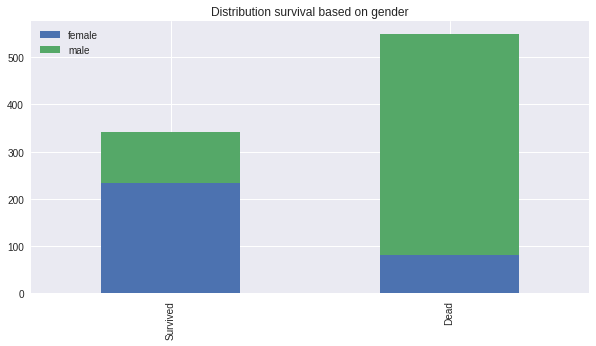

In [9]:
survived_sex = train_df[train_df['Survived'] == 1]['Sex'].value_counts()
dead_sex = train_df[train_df['Survived'] == 0]['Sex'].value_counts()
df_sex = pd.DataFrame([survived_sex, dead_sex], index=['Survived', 'Dead'])

# using pandas.dataframe.plot
df_sex.plot(kind='bar', stacked=True, figsize=(10,5), title='Distribution survival based on gender')

The `Sex` feature seems to be decisive feature. Women are more likely to survive

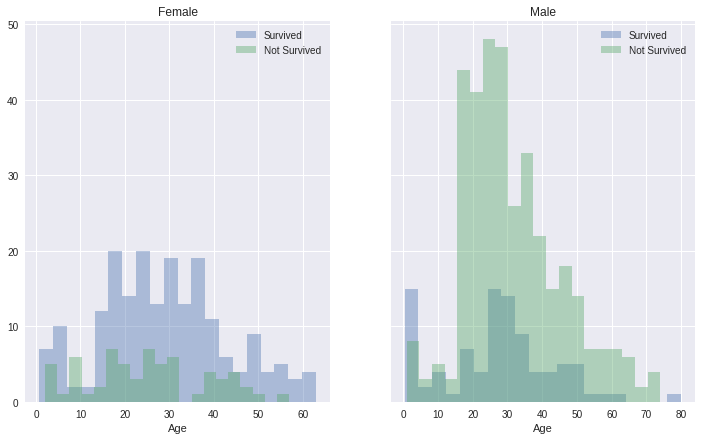

In [10]:
# create label
survived = 'Survived'
not_survived = 'Not Survived'

# initalize figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 7), sharey=True)

female = train_df[train_df['Sex'] == 'female']
male = train_df[train_df['Sex'] == 'male']

# plot female passenger
ax = sns.distplot(female[female['Survived'] == 1].Age.dropna(), 
                  bins=20, label=survived, ax=axes[0], kde=False )
ax = sns.distplot(female[female['Survived'] == 0].Age.dropna(), 
                  bins=20, label=not_survived, ax=axes[0], kde=False )

ax.legend()
ax.set_title('Female')

# plot male passenger
ax = sns.distplot(male[male['Survived'] == 1].Age.dropna(),
                 bins=20, label=survived, ax=axes[1], kde=False)
ax = sns.distplot(male[male['Survived'] == 0].Age.dropna(),
                 bins=20, label=not_survived, ax=axes[1], kde=False)

ax.legend()
ax.set_title('Male')

You will notice that male passengers have higher probability of survival when they are nearly 22 to 30 years old although passenger who not survived is still higher. For women, the survival chance are higher between 14 and 40. You also notice that passenger who less 5 years had higher survival rate in both `Sex` feature.
<br>
These two first charts confirm that one old code of conduct that sailors and captains follow in case of threatening situations: <b>"Women and children first !".</b>

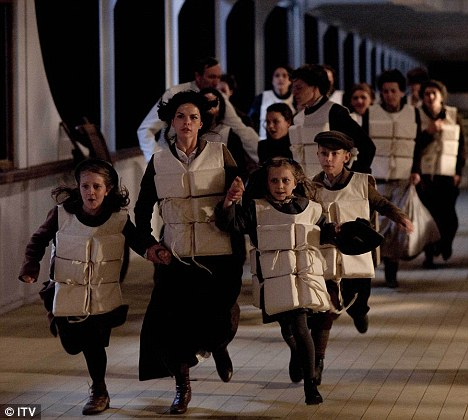

In [11]:
from IPython.display import Image
Image("img/women_childrent_first.jpg",height=700,width=700)

### `Pclass`, `Embarked` and `Sex`

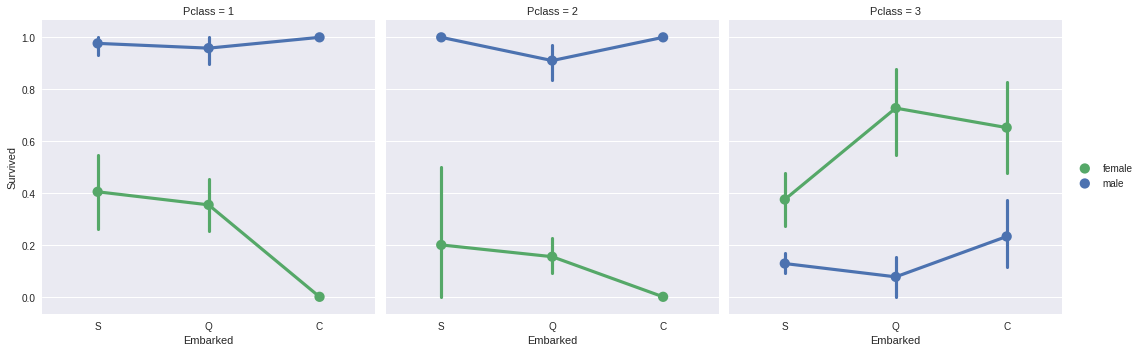

In [12]:
g = sns.FacetGrid(train_df, col='Pclass', size=5, aspect=1)
g.map(sns.pointplot, 'Embarked', 'Survived', 'Sex', palette='deep', orde=None, hue_order=None).add_legend()

`Pclass` seems have influence to survival rate. Based on plot above, we know that male passengers in `Pclass`=1 and `Pclass`=2 have higher survival rate than male passengers in `Pclass`=3. Although female passenger have higher chance to survive, only female passenger in `Pclass`=3 who have higher survival rate.
<br>
Men have a high survival probability of they are on port C, but a low probability if they are on port Q or S.

### `Pclass`, `Fare`

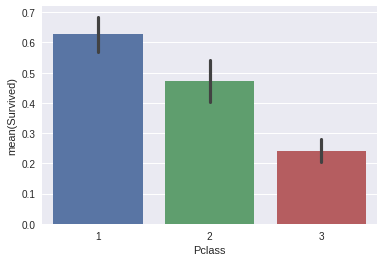

In [13]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

The upper-class passenger (`Pclass` = 1) were more likely to have survived

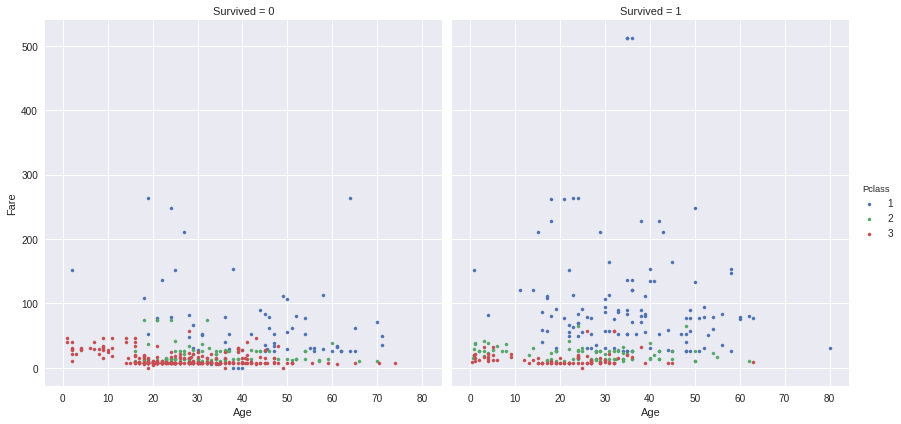

In [14]:
g = sns.FacetGrid(train_df, col='Survived', hue='Pclass', size=6, aspect=1)
g.map(plt.scatter, 'Age','Fare', s=10).add_legend()

`Survived` rate seems not have correlation with `Fare`

## Wrangle data

First, we'll drop `PassengerId` and `Ticket` in both dataset(training and test)  since it doesn't contribute to a person probability.

In [15]:
train_df = train_df.drop(['PassengerId', 'Ticket'], axis=1)
test_df = test_df.drop(['PassengerId', 'Ticket'], axis=1)
combine = [train_df, test_df]

### Missing data
As a reminder, we have to deal with Cabin (687), Age (177) and Embarked (2).

### `Cabin`
Because of `Cabin` has highly missing data, it may be dropped. Hovewer, i found something interesting. A cabin number looks like ‘C123’. The letter refers to the deck, and so we’re going to extract these and create a new feature called `Deck`. After that, we'll drop `Cabin` feature. The process of creating `Deck` is in the <b>Creating new features</b> section.

#### `Age`
We'll replace the null values with the median `Age` which is more accurate to handle missing values

In [16]:
for dataset in combine:
    dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
    # convert Age values to int
    dataset['Age'] = dataset['Age'].astype(int)
    
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,NaN,S


In [17]:
print('Number of missing value in Age(training): {}'.format(train_df['Age'].isnull().sum()))
print('Number of missing value in Age(test): {}'.format(train_df['Age'].isnull().sum()))

Number of missing value in Age(training): 0
Number of missing value in Age(test): 0


#### `Embarked`
Since the `Embarked` feature has only 2 missing values in training dataset, we'll just fill these with the most common values in the dataset

In [18]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [19]:
common_value = 'S'
train_df['Embarked'] = train_df['Embarked'].fillna(common_value)
print('Number of missing value in Embarked(training): {}'.format(train_df['Embarked'].isnull().sum()))

Number of missing value in Embarked(training): 0


#### `Fare`
We're going to fill missing value in `Fare` test_df with the median `Fare`

In [20]:
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
print('Number of missing value in Fare(test): {}'.format(test_df['Fare'].isnull().sum()))

Number of missing value in Fare(test): 0


### Creating new feature

### Title
we'll extract `Title` feature from `Name` feature using regular expressions (regex). The RegEx pattern (\w+\.) matches the first word which ends with a dot character within Name feature

In [21]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
    
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


We get 17 title from extracting, but we'll reduce them all to Mrs, Miss, Mr and Master since it's most common title.

In [22]:
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col', 'Sir']:
        return 'Mr'
    elif title in ['Countess', 'Mme', 'Lady']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

In [23]:
train_df['Title'] = train_df.apply(replace_titles, axis=1)
test_df['Title'] = test_df.apply(replace_titles, axis=1)

combine = [train_df, test_df]

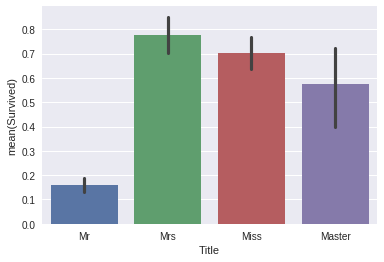

In [24]:
sns.barplot(x='Title', y='Survived', data=train_df)

Now we can safely drop the `Name` feature from dataset

In [25]:
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,male,22,1,0,7.2500,NaN,S,Mr
1,1,1,female,38,1,0,71.2833,C85,C,Mrs
2,1,3,female,26,0,0,7.9250,NaN,S,Miss
3,1,1,female,35,1,0,53.1000,C123,S,Mrs
4,0,3,male,35,0,0,8.0500,NaN,S,Mr


### `Family Size`

`SibSp` and `Parch` would make more sense when combined as one feature that show the total number of family. We also create new feature that show if someone is alone or not.

In [26]:
for dataset in combine:
    dataset['FamilySize'] = dataset['Parch'] + dataset['SibSp']

In [27]:
def check_familysize(x):
    x = x['FamilySize']
    if x > 0:
        return 0
    else:
        return 1

In [28]:
for dataset in combine:
    dataset['IsAlone'] = dataset.apply(check_familysize, axis=1)

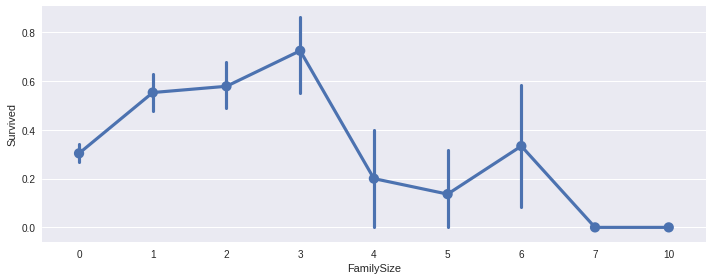

In [29]:
sns.factorplot('FamilySize', 'Survived', data=train_df, aspect = 2.5)

Here we can see that there's a high probabilty of survival with 1 to 3 `FamilySize`, but a lower one if we had less than 1 or more than 3 (except for some cases with 6).

### `Deck`
In the picture below you can see the actual decks of the titanic, ranging from A to G. But i found T Deck in `Cabin` feature. I still don't know where is it.. 

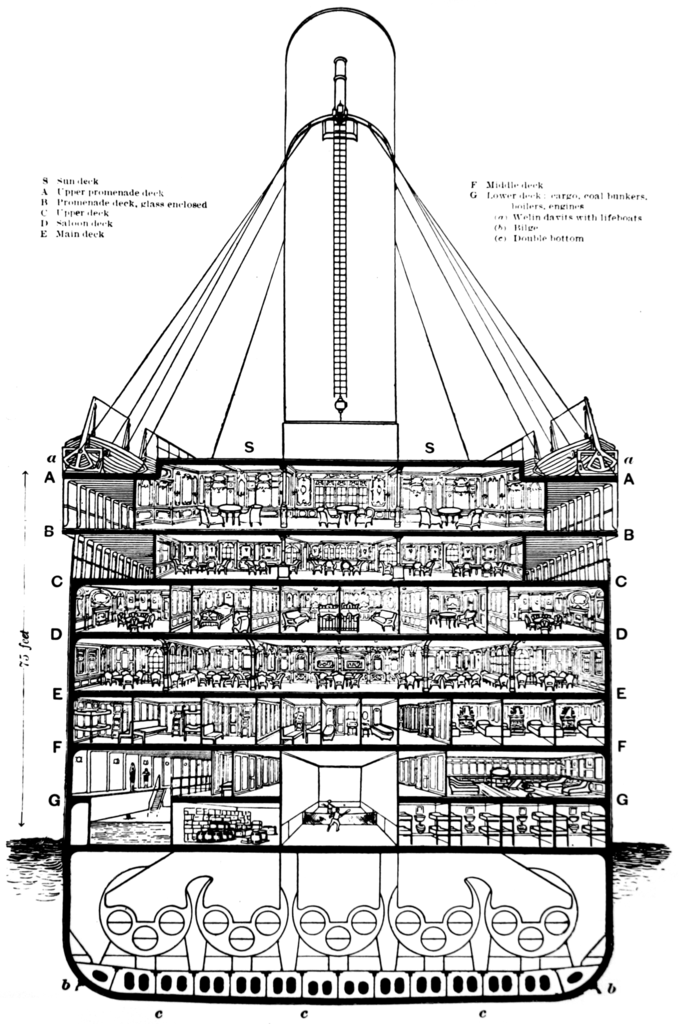

In [30]:
from IPython.display import Image
Image("img/titanic_cutaway_diagram.png",height=700,width=700)

Thefore, we're using regular expression to extracting `Deck` feature. So, we can keep T value for futher analyzing.

In [31]:
for dataset in combine:
    # Replace missing values with "Unknown"
    dataset['Cabin'] = dataset['Cabin'].fillna('Unknown')

    # Create a feature for the deck
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())

In [32]:
train_df[['Deck', 'Survived']].groupby(['Deck'], as_index=False).mean()

,Deck,Survived
0,A,0.466667
1,B,0.744681
2,C,0.593220
3,D,0.757576
4,E,0.750000
5,F,0.615385
6,G,0.500000
7,T,0.000000
8,Unknown,0.299854


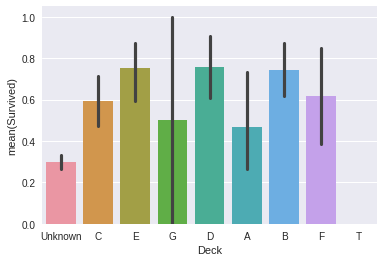

In [33]:
sns.barplot(x='Deck', y='Survived', data=train_df)

In [34]:
pd.crosstab(train_df['Deck'], train_df['Survived'])

Survived,0,1
Deck,,
A,8,7
B,12,35
C,24,35
D,8,25
E,8,24
F,5,8
G,2,2
T,1,0
Unknown,481,206


Now we can drop `Cabin` safety

In [35]:
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Deck
0,0,3,male,22,1,0,7.2500,S,Mr,1,0,Unknown
1,1,1,female,38,1,0,71.2833,C,Mrs,1,0,C
2,1,3,female,26,0,0,7.9250,S,Miss,0,1,Unknown
3,1,1,female,35,1,0,53.1000,S,Mrs,1,0,C
4,0,3,male,35,0,0,8.0500,S,Mr,0,1,Unknown


### Converting object to numeric
We're going to convert which contain strings to numerical values. This is required by most model algorithms. 

In [36]:
train_df.info()
print('-'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null object
Age           891 non-null int64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
Title         891 non-null object
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Deck          891 non-null object
dtypes: float64(1), int64(7), object(4)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
Pclass        418 non-null int64
Sex           418 non-null object
Age           418 non-null int64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          418 non-null float64
Embarked      418 non-null object
Title         418 non-null object
FamilySize    4

Based on above informatiom, we have to deal with four categorical features: `Sex`, `Title`, `Embarked` and `Deck'

#### Sex
We start by converting `Sex` feature where male=1 and female=0

In [37]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'male':1, 'female':0}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Deck
0,0,3,1,22,1,0,7.2500,S,Mr,1,0,Unknown
1,1,1,0,38,1,0,71.2833,C,Mrs,1,0,C
2,1,3,0,26,0,0,7.9250,S,Miss,0,1,Unknown
3,1,1,0,35,1,0,53.1000,S,Mrs,1,0,C
4,0,3,1,35,0,0,8.0500,S,Mr,0,1,Unknown


#### TItle
We're going to convert `Title` features to numeric where Mr=1, Mrs=2, Miss=3 and Master=4

In [38]:
title_mapping = {'Mr':1, 'Mrs':2, 'Miss':3, 'Master':4}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Deck
0,0,3,1,22,1,0,7.2500,S,1,1,0,Unknown
1,1,1,0,38,1,0,71.2833,C,2,1,0,C
2,1,3,0,26,0,0,7.9250,S,3,0,1,Unknown
3,1,1,0,35,1,0,53.1000,S,2,1,0,C
4,0,3,1,35,0,0,8.0500,S,1,0,1,Unknown


#### Embarked
Next, we convert `Embarked` feature where S=1, C=2, and Q=3

In [39]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':1, 'C':2, 'Q':3}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Deck
0,0,3,1,22,1,0,7.2500,1,1,1,0,Unknown
1,1,1,0,38,1,0,71.2833,2,2,1,0,C
2,1,3,0,26,0,0,7.9250,1,3,0,1,Unknown
3,1,1,0,35,1,0,53.1000,1,2,1,0,C
4,0,3,1,35,0,0,8.0500,1,1,0,1,Unknown


#### Deck
Finaly, we convert `Deck` feature

In [40]:
deck_mapping = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8, 'Unknown':0}
for dataset in combine:
    dataset['Deck'] = dataset['Deck'].map(deck_mapping).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Deck
0,0,3,1,22,1,0,7.2500,1,1,1,0,0
1,1,1,0,38,1,0,71.2833,2,2,1,0,3
2,1,3,0,26,0,0,7.9250,1,3,0,1,0
3,1,1,0,35,1,0,53.1000,1,2,1,0,3
4,0,3,1,35,0,0,8.0500,1,1,0,1,0


### Converting numerical feature to  categorical features
Some models are sensitive to the magnitude of the values of the variables. So, we must scalling them by converting numerical feature to categorical features 

#### `Age`
Before converting `Age` features, we're going to create `Age Bands` for determine range of its values. 

In [41]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.344762
2,"(32.0, 48.0]",0.403226
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Next, we can convert `Age` feature to ordinal based `AgeBand`

In [42]:
for dataset in combine:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 80, 'Age'] = 4
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Deck,AgeBand
0,0,3,1,1,1,0,7.2500,1,1,1,0,0,"(16.0, 32.0]"
1,1,1,0,2,1,0,71.2833,2,2,1,0,3,"(32.0, 48.0]"
2,1,3,0,1,0,0,7.9250,1,3,0,1,0,"(16.0, 32.0]"
3,1,1,0,2,1,0,53.1000,1,2,1,0,3,"(32.0, 48.0]"
4,0,3,1,2,0,0,8.0500,1,1,0,1,0,"(32.0, 48.0]"


Now we can remove `AgeBand` feature

In [43]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Deck
0,0,3,1,1,1,0,7.2500,1,1,1,0,0
1,1,1,0,2,1,0,71.2833,2,2,1,0,3
2,1,3,0,1,0,0,7.9250,1,3,0,1,0
3,1,1,0,2,1,0,53.1000,1,2,1,0,3
4,0,3,1,2,0,0,8.0500,1,1,0,1,0


#### `Fare`
For `Fare` feature, we need to do same as with the `Age` feature. But, if we use `pd.cut()`, 80% of the values would be fall into the first category because `pd.cut()` will choose the bins to be evenly spaced according to the values themselves and not the frequency of those values. So, we're using `pd.qcut()` to get same number of records in each bins.

In [44]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Now we can convert `Fare` feature to ordinal values based on `FareBand`

In [45]:
# drop FareBand
train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

for dataset in combine:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3
    # convert to Int type
    dataset['Fare'] = dataset['Fare'].astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Deck
0,0,3,1,1,1,0,0,1,1,1,0,0
1,1,1,0,2,1,0,3,2,2,1,0,3
2,1,3,0,1,0,0,1,1,3,0,1,0
3,1,1,0,2,1,0,3,1,2,1,0,3
4,0,3,1,2,0,0,1,1,1,0,1,0


## Building the models

In [46]:
# separete feature and label in train_df
X_train = train_df.drop(['Survived'], axis=1)
y_train = train_df['Survived']

X_train.shape, y_train.shape, test_df.shape

((891, 11), (891,), (418, 11))

#### Logistic Regression 

In [47]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(test_df)
result_log = round(logreg.score(X_train, y_train) * 100, 2)
result_log

81.709999999999994

In [48]:
# coeff_df = pd.DataFrame(train_df.columns.delete(0))
# coeff_df.columns = ['Feature']
# coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

# coeff_df.sort_values(by='Correlation', ascending=False)

#### Support Vector Machines

In [49]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(test_df)
result_svc = round(svc.score(X_train, y_train) * 100, 2)
result_svc

84.400000000000006

#### K-Nearest Neighbors Algortihm

In [50]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(test_df)
result_knn = round(knn.score(X_train, y_train) * 100, 2)
result_knn

87.430000000000007

#### Gaussian Naive Bayes

In [51]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(test_df)
result_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
result_gaussian

80.579999999999998

#### Perceptron

In [52]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(test_df)
result_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
result_perceptron

/home/eriansha/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


79.909999999999997

#### Linear SVC

In [53]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(test_df)
result_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
result_linear_svc

82.379999999999995

#### Decision Tree

In [54]:
decisson_tree = DecisionTreeClassifier()
decisson_tree.fit(X_train, y_train)
Y_pred = decisson_tree.predict(test_df)
result_decisson_tree = round(decisson_tree.score(X_train, y_train) * 100, 2)
result_decisson_tree

90.909999999999997

#### Random Forest

In [55]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(test_df)
result_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
result_random_forest

90.239999999999995

### Model Evaluation

In [56]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbors',
               'Gaussian Naive Bayes', 'Perceptron', 'Linear SVC', 
               'Decission Tree', 'Random Forest'],
    'Score' : [result_log, result_svc, result_knn, 
               result_gaussian, result_perceptron, result_linear_svc,
              result_decisson_tree, result_random_forest]
})

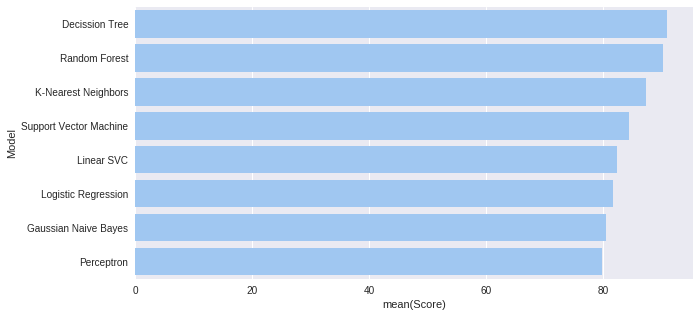

In [57]:
f, ax = plt.subplots(figsize=(10, 5))

sns.set_color_codes('pastel')
sns.barplot(x='Score', y='Model', data=models.sort_values(by='Score', ascending=False), color='b')

## References
this notebook has been inspired by various previous great work and other resources
- [Titanic Data Science Solution](https://www.kaggle.com/startupsci/titanic-data-science-solutions)
- [End to End Project With Python](https://www.kaggle.com/niklasdonges/end-to-end-project-with-python)
- [Basic Feature Engineering with the Titanic Dataset](https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/)